In [ ]:
!pip install tensorflow

In [ ]:
!pip install datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [3]:
# from datasets import load_dataset

# dataset = load_dataset("toughdata/quora-question-answer-dataset")
# dataset = dataset["train"].train_test_split(test_size=0.2)

In [5]:
# dfst = dataset.to_pandas()

In [2]:
df = pd.read_json("hf://datasets/toughdata/quora-question-answer-dataset/Quora-QuAD.jsonl", lines=True)
df.head()

,question,answer
0,Why whenever I get in the shower my girlfriend...,Isn’t it awful? You would swear that there was...
1,"What is a proxy, and how can I use one?",A proxy server is a system or router that prov...
2,"What song has the lyrics ""someone left the cak...",MacArthur's Park\n
3,I am the owner of an adult website called http...,Don't let apps that are liers put adds on your...
4,Does the Bible mention anything about a place ...,St. John in the book of Revelation mentions an...


In [3]:
df.dtypes

question    object
answer      object
dtype: object

In [4]:
df.isna().any()

question    False
answer      False
dtype: bool

In [6]:
df = df.drop_duplicates(keep='first')

In [7]:
df.shape

(55182, 2)

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

# Download necessary NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

In [15]:
# nltk.download('omw-1.4')

Preprocessing the text in the dataset

In [15]:
def preprocess_text(val):
    # Convert to lowercase
    val = val.lower()
    # Remove punctuation
    val = val.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(val)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [17]:
df['question_preprocessed'] = df['question'].apply(preprocess_text)
df['answer_preprocessed'] = df['answer'].apply(preprocess_text)

In [18]:
df = df.drop(['question', 'answer'], axis=1)
df.head()

,question_preprocessed,answer_preprocessed
0,whenev get shower girlfriend want join,’ aw would swear ’ enough hot water go around
1,proxi use one,proxi server system router provid gateway user...
2,song lyric someon left cake rain,macarthur park
3,owner adult websit call httpsmatureanalloversc...,dont let app lier put add site like one say fr...
4,bibl mention anyth place heaven hell,st john book revel mention address scholar sug...


In [19]:
df.rename(columns={'question_preprocessed': 'question', 'answer_preprocessed': 'answer'}, inplace = True)
df.head()

,question,answer
0,whenev get shower girlfriend want join,’ aw would swear ’ enough hot water go around
1,proxi use one,proxi server system router provid gateway user...
2,song lyric someon left cake rain,macarthur park
3,owner adult websit call httpsmatureanalloversc...,dont let app lier put add site like one say fr...
4,bibl mention anyth place heaven hell,st john book revel mention address scholar sug...


Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['question'], df['answer'], random_state= 2, test_size=0.2, shuffle=True)

In [ ]:
!pip install transformers

In [ ]:
!pip install sentencepiece

In [ ]:
!pip install tf-keras

In [25]:
df_train = pd.concat([x_train, y_train], join='outer', axis=1)
df_test = pd.concat([x_test, y_test], join='outer', axis=1)
df_test.head()

,question,answer
1611,human look 1000 year,pretti much exactli mean due migrat intermingl...
41914,80 option becom 30 would,ye enjoy year life experienc 30 ’ becam champi...
24427,everi year top 5 mutual fund chang select part...,howev much investor wish “ invest forget ” fun...
912,get neighbor accept survey stake share propert...,let pay survey meantim proceed neighbor exist
10458,star trek ii wrath khan 1982 worth watch found...,a2a absolut child found motion pictur way much...


In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install accelerate -U

In [27]:
from transformers import BertTokenizer, BertForQuestionAnswering, Trainer, TrainingArguments

In [28]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = BertForQuestionAnswering.from_pretrained("bert-base-uncased")


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [31]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments

In [33]:
# from transformers import TFT5ForConditionalGeneration

In [35]:
t5_tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-base")
t5_model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-base")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


GPT2

In [142]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments

In [144]:
gpt_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
gpt_model = GPT2LMHeadModel.from_pretrained("gpt2")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [37]:
import torch

In [39]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    predict_with_generate=True,
)

In [41]:
from datasets import Dataset

In [43]:
dst_train = Dataset.from_pandas(df_train)

In [ ]:
# !pip install datasets

In [45]:
dst_train

Dataset({
    features: ['question', 'answer', '__index_level_0__'],
    num_rows: 44145
})

In [47]:
dst_test = Dataset.from_pandas(df_test)

FLAN-T5

In [50]:
def t5_preprocess_function(examples):
    inputs = ["answer the question: " + q for q in examples["question"]]
    model_inputs = t5_tokenizer(inputs, padding='max_length', max_length=128, truncation=True)
    labels = t5_tokenizer(examples["answer"],padding='max_length', max_length=512, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

BERT

In [53]:
def bert_preprocess_function(examples):
    inputs = bert_tokenizer(examples["question"], examples["answer"], truncation=True, padding="max_length", max_length=512)
    inputs["labels"] = inputs["input_ids"]
    return inputs

GPT

In [156]:
def gpt_preprocess_function(examples):
    inputs = ["answer the question: " + q for q in examples["question"]]
    model_inputs = gpt_tokenizer(inputs, max_length=512, truncation=True)
    labels = gpt_tokenizer(examples["answer"], max_length=512, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
bert_tokenized_dst_train = dst_train.map(bert_preprocess_function, batched=True)
bert_tokenized_dst_test = dst_test.map(bert_preprocess_function, batched=True)

T5

In [59]:
t5_tokenized_dst_train = dst_train.map(t5_preprocess_function, batched=True)
t5_tokenized_dst_test = dst_test.map(t5_preprocess_function, batched=True)

Map:   0%|          | 0/44145 [00:00<?, ? examples/s]

Map:   0%|          | 0/11037 [00:00<?, ? examples/s]

GPT

In [158]:
gpt_tokenized_dst_train = dst_train.map(gpt_preprocess_function, batched=True)
gpt_tokenized_dst_test = dst_test.map(gpt_preprocess_function, batched=True)

Map:   0%|          | 0/44145 [00:00<?, ? examples/s]

Map:   0%|          | 0/11037 [00:00<?, ? examples/s]

BERT

In [61]:
bert_tokenized_dst_train

Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 44145
})

In [63]:
bert_tokenized_dst_test

Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 11037
})

T5

In [66]:
t5_tokenized_dst_train

Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 44145
})

In [68]:
t5_tokenized_dst_test

Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 11037
})

GPT

In [160]:
gpt_tokenized_dst_train

Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 44145
})

In [162]:
gpt_tokenized_dst_test

Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 11037
})

BERT

In [94]:
bert_tok_dst_train_sampled = bert_tokenized_dst_train.shuffle(seed=42).select(range(2000))
bert_tok_dst_test_sampled = bert_tokenized_dst_test.shuffle(seed=42).select(range(500))

T5

In [74]:
t5_tok_dst_train_sampled = t5_tokenized_dst_train.shuffle(seed=42).select(range(5000))
t5_tok_dst_test_sampled = t5_tokenized_dst_test.shuffle(seed=42).select(range(1250))

GPT

In [164]:
gpt_tok_dst_train_sampled = gpt_tokenized_dst_train.shuffle(seed=42).select(range(2000))
gpt_tok_dst_test_sampled = gpt_tokenized_dst_test.shuffle(seed=42).select(range(500))

Predictions T5

In [ ]:
!pip install rouge-score

In [ ]:
!pip install --upgrade nltk

In [76]:
from rouge_score import rouge_scorer

In [78]:
import sklearn

In [80]:
from nltk.translate.bleu_score import sentence_bleu

In [136]:
def compute_rouge(predictions, references):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = [scorer.score(pred, ref) for pred, ref in zip(predictions, references)]
    return scores

def compute_bleu(predictions, references):
    scores = [sentence_bleu([ref.split()], pred.split()) for pred, ref in zip(predictions, references)]
    return scores

def compute_f1(predictions, references):
    predictions = [pred.split() for pred in predictions]
    references = [ref.split() for ref in references]
    scores = [sklearn.metrics.f1_score(ref, pred, average='weighted') for pred, ref in zip(predictions, references)]
    return scores

In [84]:
def generate_predictions(dataset):
    predictions = []
    references = []
    for example in dataset:
        input_text = f"answer the question: {example['question']}"
        input_ids = t5_tokenizer.encode(input_text, return_tensors="pt")
        with torch.no_grad():
            output = t5_model.generate(input_ids, max_length=512, num_return_sequences=1)
            answer = t5_tokenizer.decode(output[0], skip_special_tokens=True)
        predictions.append(answer)
        references.append(example['answer'])
    return predictions, references

In [86]:
predictions, references = generate_predictions(t5_tok_dst_test_sampled)

In [128]:
from numpy import array
c = array(references)
d = array(predictions)
print(c.shape)
print(d.shape)

(1250,)
(1250,)


In [98]:
from nltk.translate.bleu_score import sentence_bleu
from sklearn.metrics import f1_score

Rouge Scores

In [100]:
rouge_scores = compute_rouge(predictions, references)
avg_rouge = {key: sum(score[key].fmeasure for score in rouge_scores) / len(rouge_scores) for key in rouge_scores[0]}
print(f"Average ROUGE scores: {avg_rouge}")

Average ROUGE scores: {'rouge1': 0.022319084438360923, 'rouge2': 0.002821958552812256, 'rougeL': 0.021580922649481887}


Rouge Scores:
1. 'rouge1': 0.022319084438360923
2. 'rouge2': 0.002821958552812256
3. 'rougeL': 0.021580922649481887

In [ ]:
bleu_scores = compute_bleu(predictions, references)
avg_bleu = sum(bleu_scores) / len(bleu_scores)
print(f"Average BLEU score: {avg_bleu}")


In [ ]:
f1_scores = compute_f1(predictions, references)

# Print average scores

avg_f1 = sum(f1_scores) / len(f1_scores)

print(f"Average F1 score: {avg_f1}")

Prediction of question.

In [186]:
def answer_question(question):
    input_text = f"answer the question: {question}"
    input_ids = t5_tokenizer.encode(input_text, return_tensors="pt")

    # Generate answer
    with torch.no_grad():
        output = t5_model.generate(input_ids)
        answer = t5_tokenizer.decode(output[0], skip_special_tokens=True)

    return answer

# Example usage
new_question = "What is chennai"
generated_answer = answer_question(new_question)
print(f"Answer: {generated_answer}")

Answer: a city


BERT Predictions

In [ ]:
# Generate predictions
def generate_predictions2(dataset):
    predictions = []
    references = []
    for example in dataset:
        input_text = f"answer the question: {example['question']}"
        input_ids = bert_tokenizer.encode(input_text, return_tensors="pt")
        with torch.no_grad():
            output = bert_model.generate(input_ids, max_length=512, num_return_sequences=1)
            answer = bert_tokenizer.decode(output[0], skip_special_tokens=True)
        predictions.append(answer)
        references.append(example['answer'])
    return predictions, references

# Evaluate the model
predictions, references = generate_predictions2(bert_tok_dst_test_sampled)

GPT Predictions

In [ ]:
def generate_predictions3(dataset):
    predictions = []
    references = []
    for example in dataset:
        input_text = f"answer the question: {example['question']}"
        input_ids = gpt_tokenizer.encode(input_text, return_tensors="pt")
        with torch.no_grad():
            output = gpt_model.generate(input_ids, max_length=512, num_return_sequences=1)
            answer = gpt_tokenizer.decode(output[0], skip_special_tokens=True)
        predictions.append(answer)
        references.append(example['answer'])
    return predictions, references

# Evaluate the model
predictions, references = generate_predictions3(gpt_tok_dst_test_sampled)

GPT Rouge Scores

In [168]:
gpt_rouge_scores = compute_rouge(predictions, references)
# Print average scores
gpt_avg_rouge = {key: sum(score[key].fmeasure for score in gpt_rouge_scores) / len(gpt_rouge_scores) for key in gpt_rouge_scores[0]}
print(f"Average ROUGE scores: {gpt_avg_rouge}")

Average ROUGE scores: {'rouge1': 0.0220655099710691, 'rouge2': 0.00416956645250348, 'rougeL': 0.019539540289236046}


Rouge Scores - GPT Model
1. 'rouge1': 0.0220655099710691
2. 'rouge2': 0.00416956645250348
3. 'rougeL': 0.019539540289236046

In [122]:
tok_dst_train_sampled

Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 2000
})

In [124]:
tok_dst_test_sampled

Dataset({
    features: ['question', 'answer', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 500
})

BERT Trainer & Trainer Args

In [127]:
bert_training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=3,
)

In [129]:
bert_trainer = Trainer(
    model=bert_model,
    args=bert_training_args,
    train_dataset=bert_tok_dst_train_sampled,
    eval_dataset=bert_tok_dst_test_sampled,
)

FLAN-T5 Trainer Args

In [72]:
t5_trainer = Seq2SeqTrainer(
    model=t5_model,
    args=training_args,
    train_dataset=tok_dst_train_sampled,
    eval_dataset=tok_dst_test_sampled,
)

GPT Trainer & Trainer Args

In [ ]:
gpt_training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=3,
)

gpt_trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=gpt_tok_dst_train_sampled,
    eval_dataset=gpt_tok_dst_test_sampled,
)

In [131]:
torch.cuda.empty_cache()

In [80]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 2            |        cudaMalloc retries: 3         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   6082 MiB |   6082 MiB |  27823 MiB |  21740 MiB |
|       from large pool |   6047 MiB |   6047 MiB |  27714 MiB |  21666 MiB |
|       from small pool |     34 MiB |     48 MiB |    108 MiB |     74 MiB |
|---------------------------------------------------------------------------|
| Active memory         |   6082 MiB |   6082 MiB |  27823 MiB |  21740 MiB |
|       from large pool |   6047 MiB |   6047 MiB |  27714 MiB |

In [133]:
import gc
del df, x_test, x_train, y_test, y_train
gc.collect()

232

BERT

In [ ]:
bert_trainer.train()

FLAN-T5

In [ ]:
t5_trainer.train()

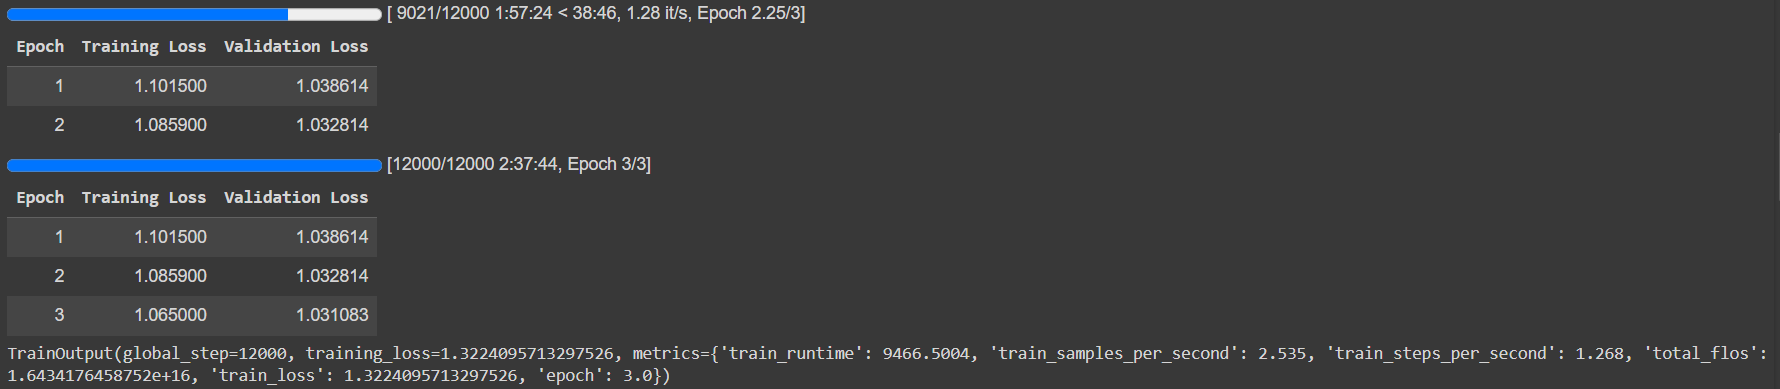

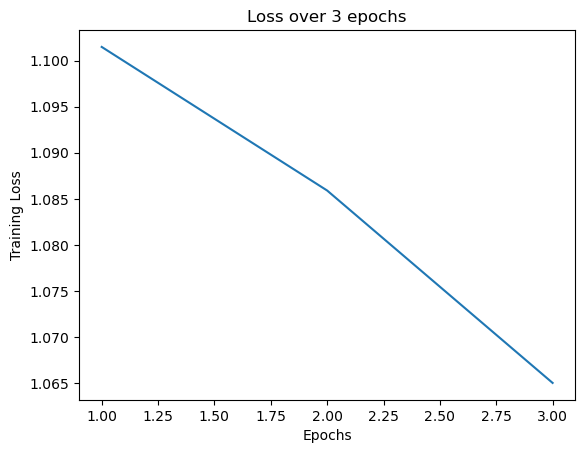

In [176]:
import matplotlib.pyplot as plt

# x axis values
epoch = [1,2,3]
# corresponding y axis values
training_loss = [1.1015,1.0859,1.065]

# plotting the points 
plt.plot(epoch, training_loss)

# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Training Loss')

# giving a title to my graph
plt.title('Loss over 3 epochs')

# function to show the plot
plt.show()

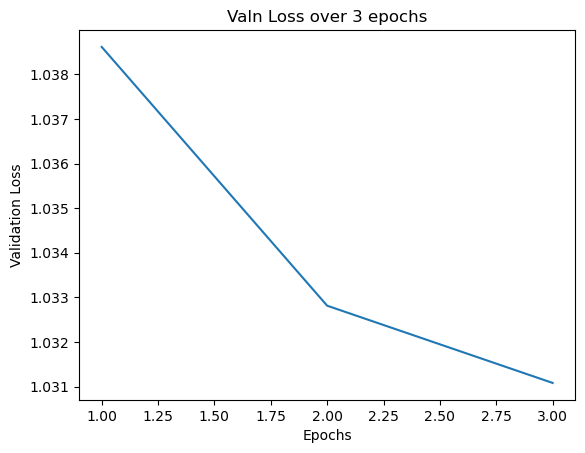

In [178]:
import matplotlib.pyplot as plt

# x axis values
epoch = [1,2,3]
# corresponding y axis values
val_loss = [1.038614,1.032814,1.031083]

# plotting the points 
plt.plot(epoch, val_loss)

# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Validation Loss')

# giving a title to my graph
plt.title('Valn Loss over 3 epochs')

# function to show the plot
plt.show()

In [ ]:
trainer.save_model(/content/results/"t5_model")